In [ ]:
# import all necesarry libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
# Load CSV file from my google drive 

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# CSV file from Basketball Reference
# Link - https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
path = "/content/drive/MyDrive/Colab Notebooks/NBA_ML_PROJECT/NBA_PER_GAME_STATS_2020_2021_REGULAR_SEASON.csv"

nba_df = pd.read_csv(path)

In [ ]:
nba_df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,6,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,0.1,0.2,0.333,0.333,0.1,0.1,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
6,7,Nickeil Alexander-Walker\alexani01,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,1.7,4.8,0.347,2.5,5.2,0.485,0.502,1.0,1.4,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
7,8,Grayson Allen\allengr01,SG,25,MEM,50,38,25.2,3.5,8.3,0.418,2.1,5.5,0.391,1.3,2.8,0.471,0.547,1.6,1.8,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
8,9,Jarrett Allen\allenja01,C,22,TOT,63,45,29.6,4.7,7.7,0.618,0.1,0.3,0.316,4.6,7.3,0.631,0.624,3.2,4.6,0.703,3.1,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8
9,10,Al-Farouq Aminu\aminual01,PF,30,TOT,23,14,18.9,1.7,4.3,0.384,0.3,1.6,0.216,1.3,2.7,0.484,0.424,0.8,1.0,0.818,1.0,3.8,4.8,1.3,0.8,0.4,1.2,1.3,4.4


In [ ]:
# delete unnecessary column
nba_df = nba_df.drop(["Rk"], axis=1)
nba_df.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,0.1,0.2,0.333,0.333,0.1,0.1,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
6,Nickeil Alexander-Walker\alexani01,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,1.7,4.8,0.347,2.5,5.2,0.485,0.502,1.0,1.4,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
7,Grayson Allen\allengr01,SG,25,MEM,50,38,25.2,3.5,8.3,0.418,2.1,5.5,0.391,1.3,2.8,0.471,0.547,1.6,1.8,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
8,Jarrett Allen\allenja01,C,22,TOT,63,45,29.6,4.7,7.7,0.618,0.1,0.3,0.316,4.6,7.3,0.631,0.624,3.2,4.6,0.703,3.1,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8
9,Al-Farouq Aminu\aminual01,PF,30,TOT,23,14,18.9,1.7,4.3,0.384,0.3,1.6,0.216,1.3,2.7,0.484,0.424,0.8,1.0,0.818,1.0,3.8,4.8,1.3,0.8,0.4,1.2,1.3,4.4


In [ ]:
# get the number of rows and columns
nba_df.shape

(540, 29)

In [ ]:
# get the mean value of each row
nba_df.mean()

Age     25.555556
G       42.692593
GS      20.000000
MP      19.820926
FG       3.287963
FGA      7.162593
FG%      0.447703
3P       1.002593
3PA      2.815000
3P%      0.312875
2P       2.288148
2PA      4.352593
2P%      0.513740
eFG%     0.514200
FT       1.362037
FTA      1.765370
FT%      0.753718
ORB      0.817407
DRB      2.817222
TRB      3.635000
AST      1.987593
STL      0.617778
BLK      0.415000
TOV      1.093889
PF       1.635185
PTS      8.942407
dtype: float64

In [ ]:
# Drop rows with missing data
nba_cleaned = nba_df.dropna()

In [ ]:
nba_cleaned[nba_cleaned['G']<10].index

Int64Index([ 39,  59,  72,  78,  84,  89,  98, 127, 138, 143, 148, 162, 163,
            164, 201, 273, 288, 307, 317, 320, 322, 371, 384, 430, 434, 450,
            465, 478, 479, 489, 499, 510],
           dtype='int64')

In [ ]:
# Remove players who played less than 10 games
less_than_ten_games = nba_cleaned[nba_cleaned['G']<10].index

nba_cleaned.drop(less_than_ten_games, inplace = True)
nba_cleaned

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,0.1,0.2,0.333,0.333,0.1,0.1,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright\wrighde01,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2.0,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
536,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
537,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
538,Cody Zeller\zelleco01,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [ ]:
# Retrieve all numeric data
nba_numeric_data = nba_cleaned._get_numeric_data()
nba_numeric_data

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,35,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,22,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,0.1,0.2,0.333,0.333,0.1,0.1,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,28,63,39,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2.0,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
536,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
537,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
538,28,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [ ]:
# dataframe after cleaning 
nba_numeric_data.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,25.645435,47.390658,22.450106,21.052654,3.540127,7.679618,0.456297,1.110616,3.061996,0.326516,2.432909,4.622505,0.518217,0.527431,1.468790,1.892569,0.760724,0.831210,2.980892,3.812314,2.153079,0.661783,0.421444,1.153291,1.703822,9.663482
std,4.149798,17.125949,23.492986,8.801764,2.321560,4.799917,0.077383,0.908924,2.283991,0.113172,1.875826,3.426033,0.089579,0.069794,1.378136,1.679085,0.120998,0.691362,1.787979,2.318303,1.896824,0.371518,0.395758,0.820265,0.698194,6.454778
min,19.000000,10.000000,0.000000,3.100000,0.200000,0.500000,0.231000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.250000,0.000000,0.100000,0.000000,0.000000,0.300000,0.400000,0.000000,0.000000,0.000000,0.000000,0.100000,0.600000
25%,22.000000,35.000000,2.000000,14.700000,1.800000,3.900000,0.410500,0.400000,1.300000,0.287500,1.000000,2.000000,0.469500,0.491000,0.550000,0.800000,0.701000,0.400000,1.700000,2.100000,0.800000,0.400000,0.200000,0.600000,1.200000,4.950000
50%,25.000000,50.000000,12.000000,21.000000,3.000000,6.600000,0.446000,0.900000,2.600000,0.347000,1.900000,3.700000,0.514000,0.528000,1.000000,1.400000,0.778000,0.600000,2.800000,3.400000,1.500000,0.600000,0.300000,0.900000,1.700000,7.900000
75%,28.000000,62.000000,42.000000,28.500000,4.750000,10.100000,0.492500,1.700000,4.600000,0.391000,3.300000,6.100000,0.571000,0.568500,1.900000,2.400000,0.843000,1.100000,3.900000,4.900000,2.850000,0.900000,0.600000,1.500000,2.200000,12.950000
max,37.000000,72.000000,72.000000,37.600000,11.200000,23.000000,0.769000,5.300000,12.700000,1.000000,10.200000,16.800000,0.897000,0.846000,9.200000,10.700000,1.000000,4.100000,10.100000,13.500000,11.700000,2.100000,3.400000,4.800000,3.800000,32.000000


In [ ]:
# Make Clusters of players with kmeans
from sklearn.cluster import KMeans
# Model Training
kmeans_model = KMeans(n_clusters=5, random_state = 1)
# Fit the data to the model
kmeans_model.fit(nba_numeric_data)
# Get the labels 
labels = kmeans_model.labels_ 
labels

array([0, 3, 3, 1, 2, 0, 1, 1, 2, 3, 3, 0, 0, 1, 1, 4, 1, 0, 1, 3, 3, 1,
       1, 3, 4, 0, 3, 3, 3, 4, 1, 1, 0, 3, 3, 1, 0, 0, 1, 3, 2, 0, 4, 1,
       4, 3, 1, 3, 4, 4, 3, 0, 4, 4, 2, 2, 3, 0, 2, 3, 2, 3, 1, 3, 0, 4,
       0, 2, 3, 0, 0, 3, 3, 0, 4, 2, 0, 1, 1, 0, 0, 2, 4, 0, 0, 4, 4, 3,
       1, 0, 2, 4, 4, 3, 0, 1, 4, 3, 3, 1, 0, 2, 2, 2, 3, 2, 0, 4, 3, 3,
       3, 4, 0, 0, 0, 1, 1, 3, 4, 2, 1, 3, 1, 0, 0, 2, 4, 2, 3, 0, 0, 4,
       1, 3, 2, 0, 4, 3, 1, 0, 3, 4, 4, 1, 2, 3, 4, 1, 4, 1, 3, 3, 3, 0,
       4, 1, 4, 1, 4, 3, 0, 2, 0, 1, 1, 4, 0, 1, 2, 3, 3, 4, 0, 4, 0, 4,
       1, 0, 0, 0, 3, 4, 0, 2, 2, 0, 3, 3, 2, 3, 0, 1, 0, 1, 0, 4, 3, 2,
       4, 2, 1, 0, 2, 1, 3, 3, 4, 4, 2, 1, 4, 1, 4, 1, 2, 4, 4, 4, 2, 0,
       0, 3, 0, 4, 3, 4, 1, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 4, 4, 4, 0, 4,
       2, 1, 2, 4, 2, 3, 4, 0, 4, 1, 3, 1, 0, 3, 4, 1, 3, 0, 1, 1, 0, 2,
       3, 2, 0, 4, 4, 1, 4, 0, 0, 4, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       2, 4, 0, 0, 4, 0, 4, 4, 3, 2, 0, 1, 0, 3, 2,

<function matplotlib.pyplot.show>

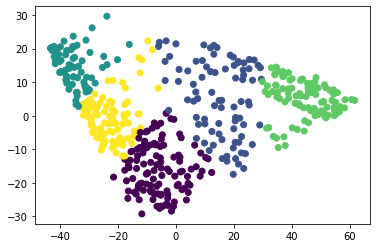

In [ ]:
# Plot players by cluster
from sklearn.decomposition import PCA
# Reduce dimensionality of data to 2 dimensions
pca_2 = PCA(2)
plot_data = pca_2.fit_transform(nba_numeric_data)
plt.scatter(x=plot_data[:,0],y=plot_data[:,1], c=labels)
plt.show

In [ ]:
# LeBron James
LeBron = nba_numeric_data.loc[nba_df["Player"] == "LeBron James\jamesle01",:]
LeBron

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
250,36,45,45,33.4,9.4,18.3,0.513,2.3,6.3,0.365,7.1,12.0,0.591,0.576,4.0,5.7,0.698,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0


In [ ]:
# Kevin Durant
KD = nba_numeric_data.loc[nba_df["Player"] == "Kevin Durant\duranke01",:]
KD

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
139,32,35,32,33.1,9.3,17.2,0.537,2.4,5.4,0.45,6.8,11.8,0.577,0.608,6.0,6.8,0.882,0.4,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9


In [ ]:
# Steph Curry
Steph = nba_numeric_data.loc[nba_df["Player"] == "Stephen Curry\curryst01",:]
Steph

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
115,32,63,63,34.2,10.4,21.7,0.482,5.3,12.7,0.421,5.1,9.0,0.569,0.605,5.7,6.3,0.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0


In [ ]:
# Nikola Jokic
Joker = nba_numeric_data.loc[nba_df["Player"] == "Nikola Jokić\jokicni01",:]
Joker

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
261,25,72,72,34.6,10.2,18.0,0.566,1.3,3.3,0.388,8.9,14.7,0.606,0.602,4.8,5.5,0.868,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4


In [ ]:
# Joel Embiid
Embiid = nba_numeric_data.loc[nba_df["Player"] == "Joel Embiid\embiijo01",:]
Embiid

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
145,26,51,51,31.1,9.0,17.6,0.513,1.1,3.0,0.377,7.9,14.6,0.541,0.545,9.2,10.7,0.859,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5


In [ ]:
# Greek Freak
GreekFreak = nba_numeric_data.loc[nba_df["PTS"] == 28.1,:]
GreekFreak

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
11,26,61,61,33.0,10.3,18.0,0.569,1.1,3.6,0.303,9.2,14.4,0.636,0.6,6.5,9.5,0.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1


In [ ]:
# Luka Doncic
Wonderboy = nba_numeric_data.loc[nba_df["Player"] == "Luka Dončić\doncilu01",:]
Wonderboy

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
129,21,66,66,34.3,9.8,20.5,0.479,2.9,8.3,0.35,6.9,12.2,0.567,0.55,5.2,7.1,0.73,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7


In [ ]:
# Converting the individual dataframes to list
LeBron_list = LeBron.values.tolist()
KD_list = KD.values.tolist()
Steph_list = Steph.values.tolist()
Joker_list = Joker.values.tolist()
Embiid_list = Embiid.values.tolist()
GreekFreak_list = GreekFreak.values.tolist()
Wonderboy_list = Wonderboy.values.tolist()

In [ ]:
# Cluster classification of the players
LeBron_Cluster = kmeans_model.predict(LeBron_list)
KD_Cluster = kmeans_model.predict(KD_list)
Steph_Cluster = kmeans_model.predict(Steph_list)
Joker_Cluster = kmeans_model.predict(Joker_list)
Embiid_Cluster = kmeans_model.predict(Embiid_list)
GreekFreak_Cluster = kmeans_model.predict(GreekFreak_list)
Wonderboy_Cluster = kmeans_model.predict(Wonderboy_list)
# Print the cluster labels
print(LeBron_Cluster)
print(KD_Cluster)
print(Steph_Cluster)
print(Joker_Cluster)
print(Embiid_Cluster)
print(GreekFreak_Cluster)
print(Wonderboy_Cluster)

[1]
[1]
[3]
[3]
[3]
[3]
[3]


In [ ]:
# Correlation between the variables
nba_numeric_data.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.157390,0.146007,0.228607,0.141388,0.136565,0.085184,0.200800,0.174075,0.083373,0.077132,0.074715,0.033072,0.192461,0.102491,0.080509,0.213263,0.069052,0.181204,0.159933,0.212907,0.203306,0.078355,0.112198,0.135955,0.151675
G,0.157390,1.000000,0.577448,0.576492,0.445056,0.425825,0.239189,0.348047,0.332865,0.160528,0.381819,0.374773,0.161782,0.323921,0.293021,0.292104,0.174695,0.277912,0.406379,0.396026,0.328574,0.421122,0.197001,0.356880,0.461485,0.431758
GS,0.146007,0.577448,1.000000,0.822363,0.735758,0.721614,0.202946,0.501417,0.504405,0.120717,0.667884,0.674653,0.112839,0.225151,0.609446,0.615345,0.166456,0.369538,0.652306,0.613403,0.578894,0.597851,0.339773,0.658200,0.600057,0.729500
MP,0.228607,0.576492,0.822363,1.000000,0.869258,0.881717,0.170337,0.675161,0.693647,0.219358,0.748895,0.772766,0.086958,0.241137,0.700061,0.696105,0.287844,0.334920,0.716064,0.651380,0.706964,0.749920,0.355640,0.771700,0.699595,0.869523
FG,0.141388,0.445056,0.735758,0.869258,1.000000,0.976633,0.275996,0.639370,0.646344,0.201727,0.928039,0.937200,0.152095,0.272929,0.853165,0.848057,0.266979,0.348451,0.706164,0.647803,0.712681,0.624636,0.325328,0.839192,0.582495,0.991147
FGA,0.136565,0.425825,0.721614,0.881717,0.976633,1.000000,0.103481,0.729249,0.753194,0.241890,0.855592,0.898772,0.018520,0.140419,0.832629,0.815749,0.313958,0.218800,0.640539,0.558309,0.738969,0.645941,0.242397,0.843833,0.550592,0.982755
FG%,0.085184,0.239189,0.202946,0.170337,0.275996,0.103481,1.000000,-0.187037,-0.250876,-0.110451,0.433401,0.311302,0.780745,0.841377,0.208732,0.255804,-0.126797,0.619364,0.398570,0.492427,0.030580,0.088791,0.442324,0.149751,0.325588,0.216361
3P,0.200800,0.348047,0.501417,0.675161,0.639370,0.729249,-0.187037,1.000000,0.984762,0.485812,0.307653,0.365239,-0.130452,0.163839,0.433926,0.370750,0.435034,-0.215632,0.282065,0.151952,0.484683,0.451710,-0.031628,0.490033,0.296351,0.693168
3PA,0.174075,0.332865,0.504405,0.693647,0.646344,0.753194,-0.250876,0.984762,1.000000,0.430569,0.323208,0.388721,-0.150347,0.070632,0.459202,0.399597,0.422154,-0.220062,0.287976,0.155213,0.511267,0.479058,-0.021999,0.521313,0.313649,0.701517
3P%,0.083373,0.160528,0.120717,0.219358,0.201727,0.241890,-0.110451,0.485812,0.430569,1.000000,0.013656,0.051887,-0.161382,0.235074,0.097650,0.041459,0.400453,-0.321393,-0.006762,-0.101013,0.167923,0.144088,-0.180237,0.115580,0.038583,0.234351


In [ ]:
from sklearn.model_selection import train_test_split

# Split data to 30% testing and 70% training
# Trying to predict TRB(Total Rebounds) with DRB(Defensive Rebounds)
x_train, x_test, y_train, y_test = train_test_split(nba_numeric_data[["TRB"]],nba_numeric_data[["DRB"]], test_size=0.3, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create Linear Regression model
lr = LinearRegression()
# Train the model with training data
lr.fit(x_train, y_train)
# Test the model with test data
predictions = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

# Model Accuracy
lr_score_test = lr.score(x_test, y_test)

r2_score_test = r2_score(y_test,predictions)

print("lr_score: ", lr_score_test)
print("r2_score : ", r2_score_test)
# DRB is an accurate predictor of TRB

lr_score:  0.9501311319448625
r2_score :  0.9501311319448625
